### Analises exploratórias da base Vendas - Projeto Integrador IV

#### Bibliotecas

In [ ]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importação

In [ ]:
#Observação * Tem que logar/autencicar com A CONTA DO GRUPOFATEC777 para conseguir carregar do BigQuery ou fazer algo com GCP

from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

#ID DO PROJETO
id_projeto = 'ID_PROJETO_GCP'

#Crie um cliente BigQuery com o ID do projeto
client = bigquery.Client(project=id_projeto)

# Escolha um conjunto de dados (substitua "db_vendas" pelo nome do seu conjunto de dados)
dataset_ref = client.dataset('db_vendas')

# Escolha uma tabela (substitua "tb_vendas" pelo nome da sua tabela)
tabela_vendas = dataset_ref.table('tb_vendas')

# Carregue a tabela em um DataFrame do Pandas
tabela = client.get_table(tabela_vendas)
df_vendas_dw = client.list_rows(tabela).to_dataframe()
df_vendas_dw.head(1)

,Fatura_Cod,Produto,Quantidade,Preco_Unitario,Fatura_Total,Data,Cliente_Cod,Dist_Cod
0,9352692,CHESS SET,1,27.99,27.99,27/05/2024 11:15,708873183,76695-102496


#### Produtos mais vendidos

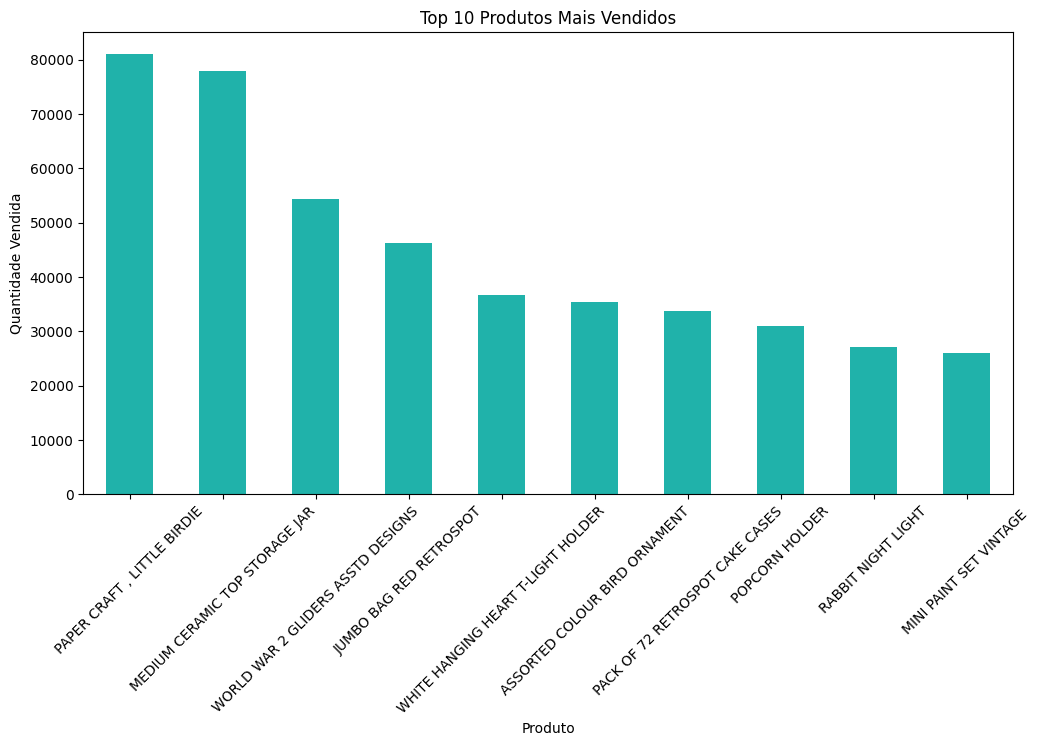

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha o DataFrame df com os dados

# Análise de Vendas por Produto
produtos_mais_vendidos = df_vendas_dw.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
faturamento_por_produto = df_vendas_dw.groupby('Produto')['Fatura_Total'].sum().sort_values(ascending=False).head(10)

# Visualização dos produtos mais vendidos
plt.figure(figsize=(12, 6))
produtos_mais_vendidos.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

#### Visualização do faturamento por produto

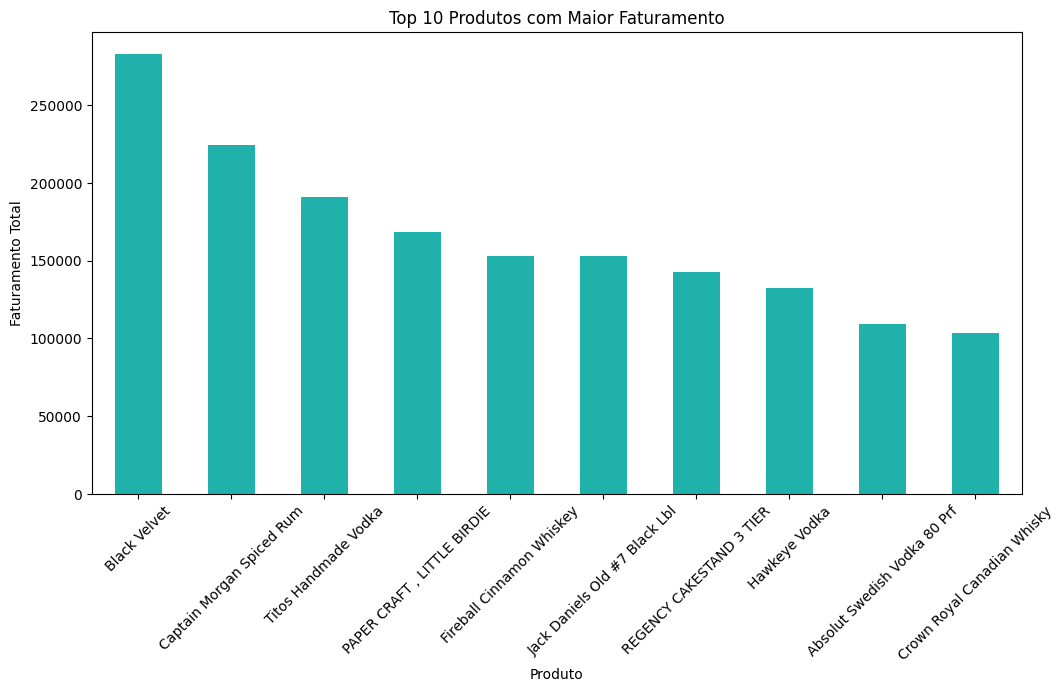

In [ ]:
plt.figure(figsize=(12, 6))
faturamento_por_produto.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Produtos com Maior Faturamento')
plt.xlabel('Produto')
plt.ylabel('Faturamento Total')
plt.xticks(rotation=45)
plt.show()

#### Cliente mais rentaveis

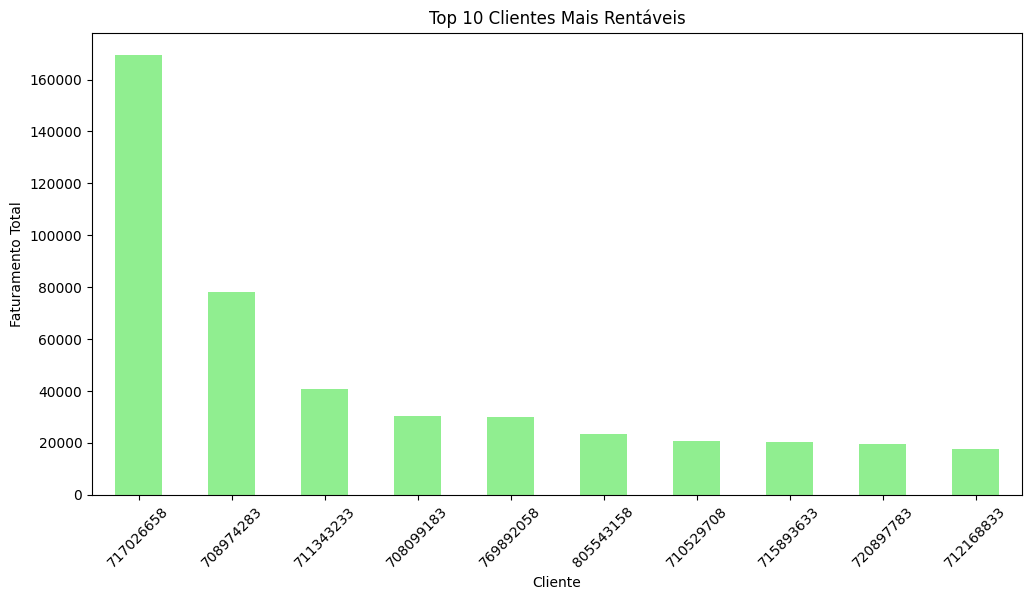

In [ ]:
clientes_mais_rentaveis = df_vendas_dw.groupby('Cliente_Cod')['Fatura_Total'].sum().sort_values(ascending=False).head(10)
frequencia_de_compra = df_vendas_dw['Cliente_Cod'].value_counts().head(10)

# Visualização dos clientes mais rentáveis
plt.figure(figsize=(12, 6))
clientes_mais_rentaveis.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Clientes Mais Rentáveis')
plt.xlabel('Cliente')
plt.ylabel('Faturamento Total')
plt.xticks(rotation=45)
plt.show()

##### Clientes que mais compram

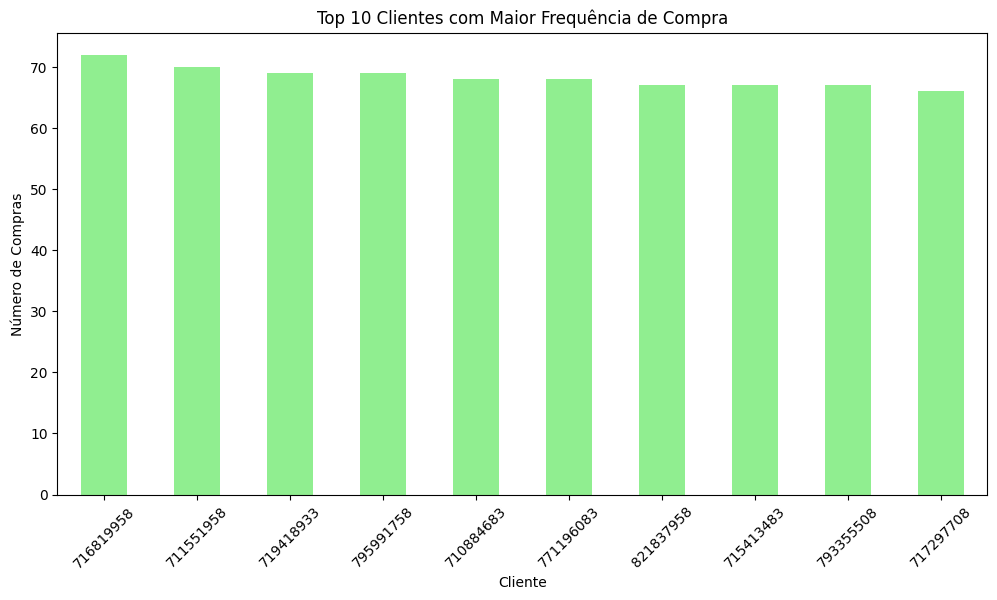

In [ ]:
plt.figure(figsize=(12, 6))
frequencia_de_compra.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Clientes com Maior Frequência de Compra')
plt.xlabel('Cliente')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

#### Anlise Temporal

In [ ]:
df_vendas_dw['Data'] = pd.to_datetime(df_vendas_dw['Data'])
df_vendas_dw['Ano-Mês'] = df_vendas_dw['Data'].dt.to_period('M')

vendas_por_mes = df_vendas_dw.groupby('Ano-Mês')['Fatura_Total'].sum()

Ano-Mês
2010-12    572713.89
2011-01    569445.04
2011-02    447137.35
2011-03    595500.76
2011-04    469200.36
             ...    
2020-07     64492.50
2020-08     83327.12
2020-09     87482.92
2024-05     42468.66
2024-06     29126.85
Freq: M, Name: Fatura_Total, Length: 120, dtype: float64

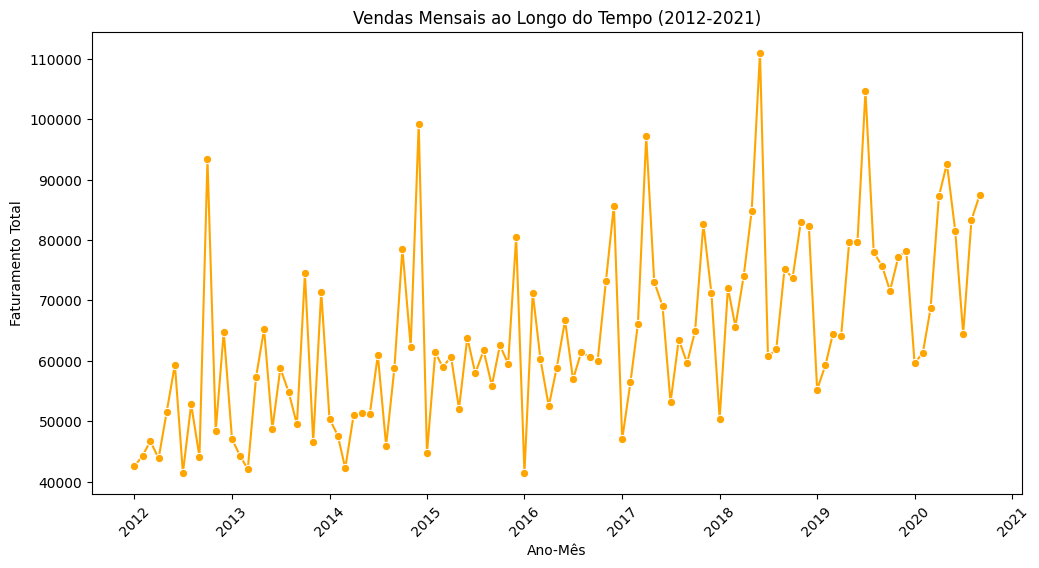

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Convertendo 'Ano-Mês' para um formato similar a datetime para o Seaborn entender

# Filtrando o DataFrame para o intervalo de 2012 a 2021
vendas_por_mes_filtered = vendas_por_mes[(vendas_por_mes.index >= '2012-01-01') & (vendas_por_mes.index <= '2022-12-31')]

# Visualização das vendas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_por_mes_filtered, marker='o', color='orange')
plt.title('Vendas Mensais ao Longo do Tempo (2012-2021)')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento Total')
plt.xticks(rotation=45)
plt.show()

#### Visualização da margem de lucro por produto

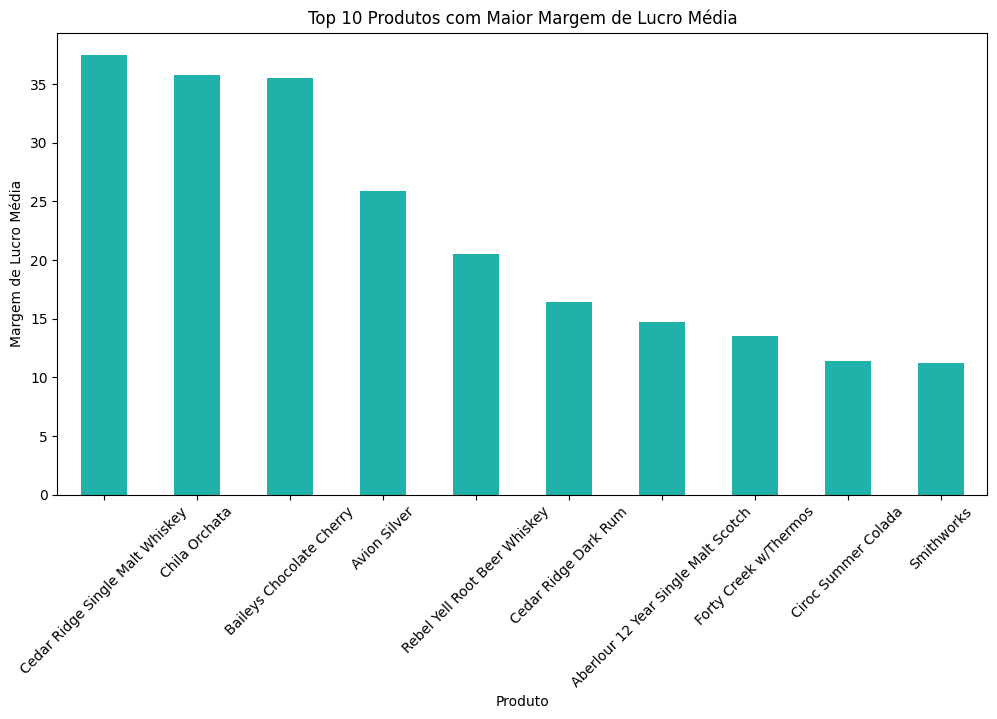

In [ ]:
df_vendas_dw['Lucro'] = df_vendas_dw['Fatura_Total'] - (df_vendas_dw['Quantidade'] * df_vendas_dw['Preco_Unitario'])

margem_de_lucro_por_produto = df_vendas_dw.groupby('Produto')['Lucro'].mean().sort_values(ascending=False).head(10)
margem_de_lucro_por_cliente = df_vendas_dw.groupby('Cliente_Cod')['Lucro'].mean().sort_values(ascending=False).head(10)

# Visualização da margem de lucro por produto
plt.figure(figsize=(12, 6))
margem_de_lucro_por_produto.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Produtos com Maior Margem de Lucro Média')
plt.xlabel('Produto')
plt.ylabel('Margem de Lucro Média')
plt.xticks(rotation=45)
plt.show()

#### Margem Lucro Cliente

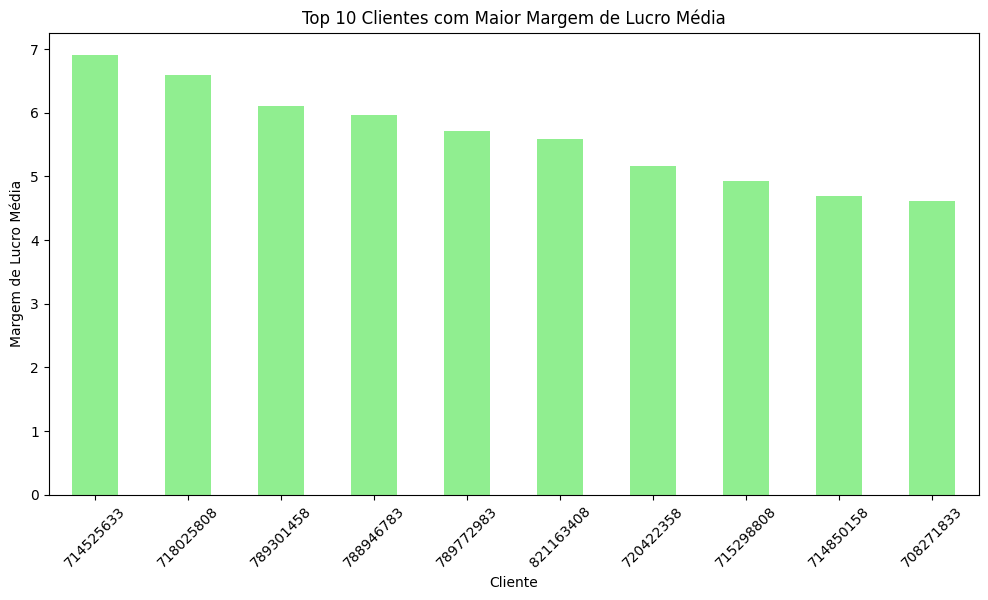

In [ ]:
plt.figure(figsize=(12, 6))
margem_de_lucro_por_cliente.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Clientes com Maior Margem de Lucro Média')
plt.xlabel('Cliente')
plt.ylabel('Margem de Lucro Média')
plt.xticks(rotation=45)
plt.show()

#### Meses que mais faturam

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the month from 'Data' and create a new 'Mes' column
df_vendas_dw['Mes'] = df_vendas_dw['Data'].dt.month_name()

# Calculate total revenue by month
df_grouped = df_vendas_dw.groupby('Mes')['Fatura_Total'].sum().reset_index()

# Create the Total Revenue by Month chart
plt.figure(figsize=(12, 8))
plt.bar(df_grouped['Mes'], df_grouped['Fatura_Total'], color='royalblue')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.title('Receita Total por Mês')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### Nuvem de Palavrasa dos Produtos

In [ ]:
# Contagem da frequência de cada produto
produto_counts = df_vendas_dw['Produto'].value_counts()

# Visualização da frequência de produtos usando um gráfico de barras
plt.figure(figsize=(12, 6))
produto_counts.plot(kind='bar')
plt.xlabel('Produto')
plt.ylabel('Frequência')
plt.title('Frequência de Produtos')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualizando a frequência de produtos usando uma Nuvem de Palavras
from wordcloud import WordCloud

wordcloud = WordCloud(width=10000, height=600, random_state=42).generate(produto_counts.index.tolist())
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Nuvem de Palavras: Frequência de Produtos')
plt.show()


#### Boxplot das colunas numéricas dos dados tratados (Quantidade, Preço Unitário e Fatura Total) - Buscando os Outliers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionando colunas numéricas para o boxplot
numerical_cols = ['Quantidade', 'Preco_Unitario', 'Fatura_Total']

# Criando um boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df_vendas_dw[numerical_cols])
plt.xlabel('Colunas Numéricas')
plt.ylabel('Valores')
plt.title('Boxplot: Distribuição das Colunas Numéricas')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#Observação * Tem que logar/autencicar com A CONTA DO GRUPOFATEC777 para conseguir carregar do BigQuery ou fazer algo com GCP

from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

#ID DO PROJETO
id_projeto = 'galvanized-sled-425803-b5'

#Cliente BigQuery
client = bigquery.Client(project=id_projeto)

#Dataset a ser usado
dataset_ref = client.dataset('db_vendas')

#Escolhendo tabela
tabela_vendas = dataset_ref.table('tb_vendas')

#Carregando Orders
tabela = client.get_table(tabela_vendas)
df_vendas_dw = client.list_rows(tabela).to_dataframe()

# Escolha uma tabela (substitua "tb_vendas" pelo nome da sua tabela)
tabela_distribuidores = dataset_ref.table('tb_distribuidoras')

#Carregando Distribuidores
tabela = client.get_table(tabela_distribuidores)
df_dist_dw = client.list_rows(tabela).to_dataframe()

#Escolhendo tabela clientes
tabela_clientes = dataset_ref.table('tb_clientes')

# Carregue a tabela em um DataFrame do Pandas
tabela = client.get_table(tabela_clientes)
df_clientes_dw = client.list_rows(tabela).to_dataframe()


fatura_cliente = pd.merge(df_vendas_dw, df_clientes_dw, on='Cliente_Cod', how='left')
fatura_final = pd.merge(fatura_cliente, df_dist_dw, on='Dist_Cod', how='left')
fatura_final.head(1)



,Fatura_Cod,Produto,Quantidade,Preco_Unitario,Fatura_Total,Data,Cliente_Cod,Dist_Cod,Cliente_Status,Cliente_Idade,...,Dist_Nome,Dist_Tipo,Dist_Endereco,Dist_Cidade,Dist_Estado,Dist_Pais,Dist_Codigo_postal,Dist_Telefone,Dist_Longitude,Dist_Latitude
0,9352692,CHESS SET,1,27.99,27.99,27/05/2024 11:15,708873183,76695-102496,Existing Customer,47,...,Target Lubbock T-2190,Licensed,6064 Brownfield Hmy,Lubbock,TX,United States,79407,806-788-3600,-101.95,33.55


In [ ]:
avg_total_paises = fatura_final.groupby("Dist_Pais").Fatura_Total.mean()
avg_total_paises = pd.DataFrame(avg_total_paises).reset_index()

avg_preco_paises = fatura_final.groupby("Dist_Pais").Preco_Unitario.mean()
avg_preco_paises = pd.DataFrame(avg_preco_paises).reset_index()

avg_qtd_paises = fatura_final.groupby("Dist_Pais").Quantidade.mean()
avg_qtd_paises = pd.DataFrame(avg_qtd_paises).reset_index()

#### Paises com mais fatura

<ipython-input-31-aad95ee498ef>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_total_paises_sorted, x="Fatura_Total", y="Dist_Pais", palette=palette_qtd)
<ipython-input-31-aad95ee498ef>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_preco_paises_sorted, x="Preco_Unitario", y="Dist_Pais", palette=palette_preco)
<ipython-input-31-aad95ee498ef>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_qtd_paises_sorted, x="Quantidade", y="Dist_Pais", palette=palette_total)


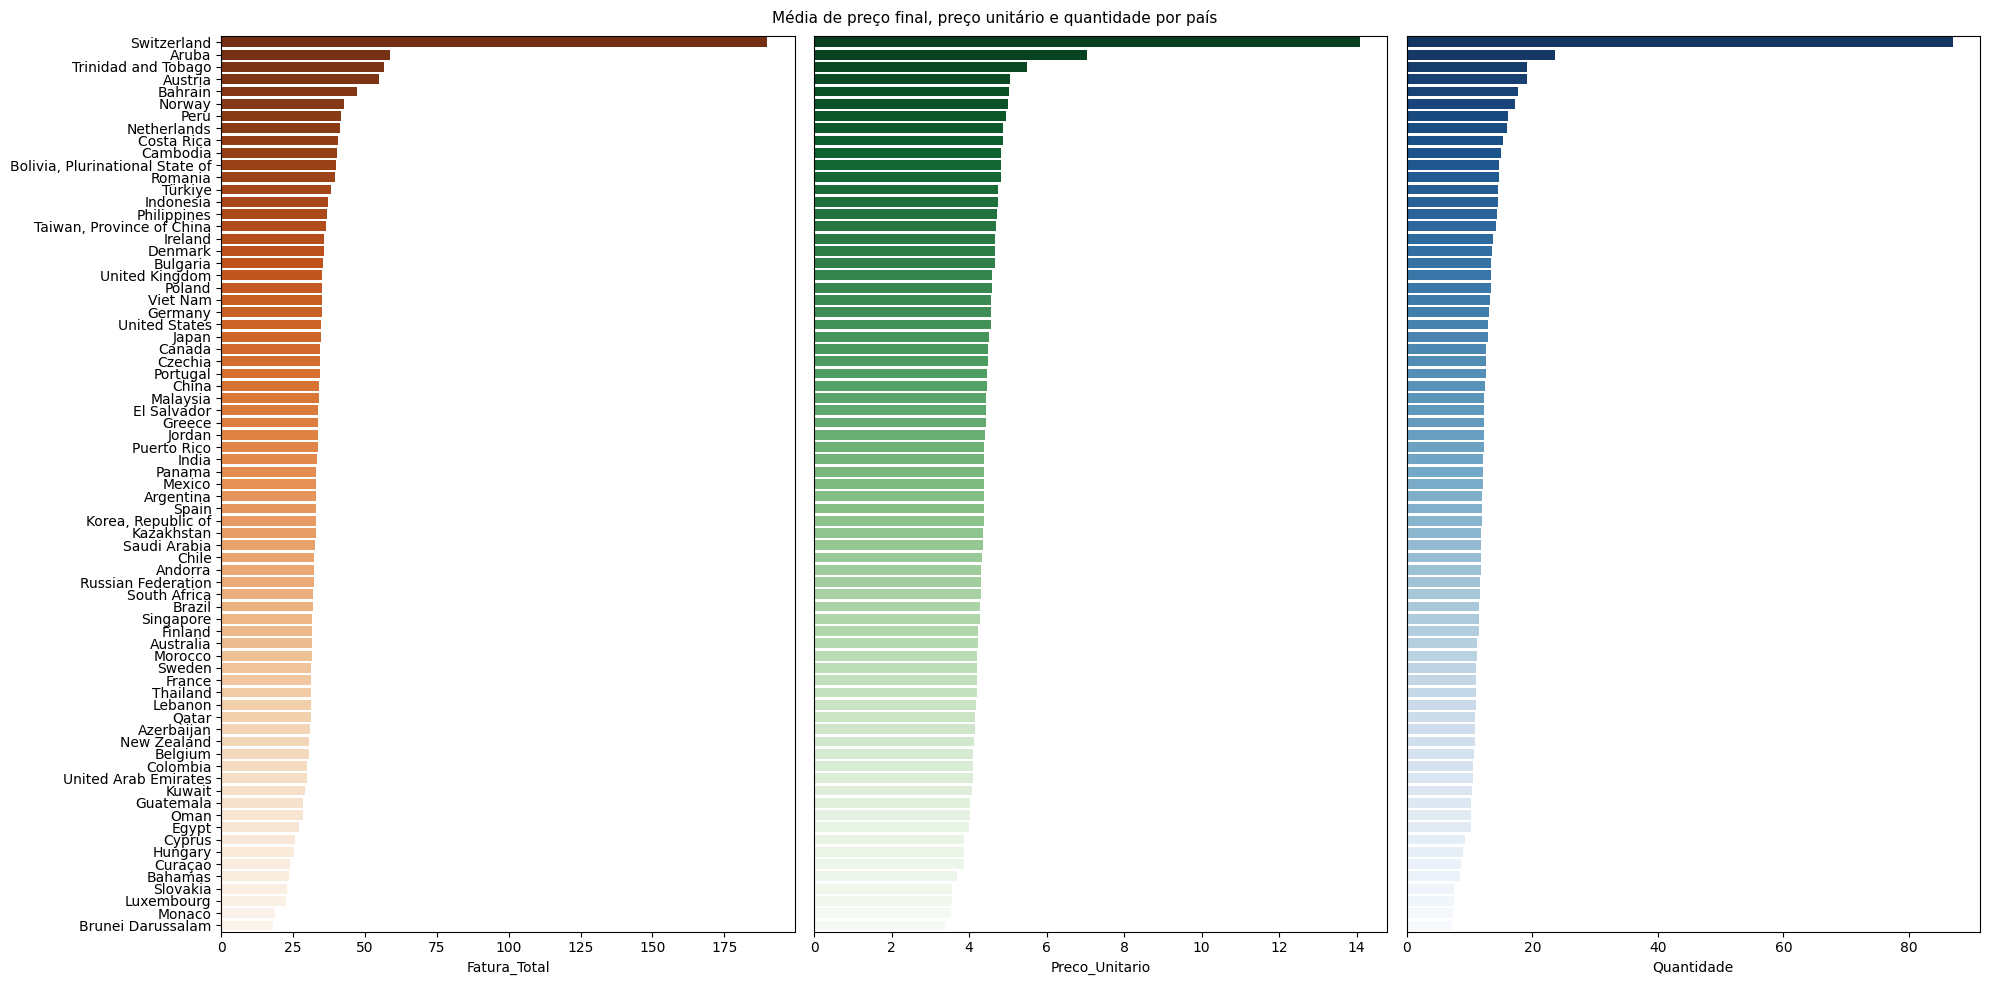

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenando os dados por média de preço final de forma descrescente
avg_total_paises_sorted = avg_total_paises.sort_values(by='Fatura_Total', ascending=False)

# Ordenando os dados por média de preço unitário de forma descrescente
avg_preco_paises_sorted = avg_preco_paises.sort_values(by='Preco_Unitario', ascending=False)

# Ordenando os dados por média de quantidade de forma descrescente
avg_qtd_paises_sorted = avg_qtd_paises.sort_values(by='Quantidade', ascending=False)

# Definindo o tamanho da figura
fig = plt.figure(figsize=(20, 10))

# Título principal da figura
fig.suptitle("Média de preço final, preço unitário e quantidade por país", size=11)

# Definindo paletas de cores invertidas
palette_total = sns.color_palette("Blues_r", len(avg_total_paises_sorted))
palette_preco = sns.color_palette("Greens_r", len(avg_preco_paises_sorted))
palette_qtd = sns.color_palette("Oranges_r", len(avg_qtd_paises_sorted))

# Primeiro subplot para média de preço final
axes = fig.add_subplot(1, 3, 1)
sns.barplot(data=avg_total_paises_sorted, x="Fatura_Total", y="Dist_Pais", palette=palette_qtd)
axes.set_ylabel('')  # Remover rótulo do eixo y

# Segundo subplot para média de preço unitário
axes = fig.add_subplot(1, 3, 2)
sns.barplot(data=avg_preco_paises_sorted, x="Preco_Unitario", y="Dist_Pais", palette=palette_preco)
axes.set_ylabel('')  # Remover rótulo do eixo y

# Terceiro subplot para média de quantidade
axes = fig.add_subplot(1, 3, 3)
sns.barplot(data=avg_qtd_paises_sorted, x="Quantidade", y="Dist_Pais", palette=palette_total)
axes.set_ylabel('')  # Remover rótulo do eixo y

# Ajustando a visibilidade dos eixos y conforme solicitado
fig.axes[1].get_yaxis().set_visible(False)
fig.axes[2].get_yaxis().set_visible(False)

# Ajuste final para espaçamento entre subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()


#### Media Fatura Total graficamente

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = avg_total_paises["Dist_Pais"],
                  locationmode = "country names",
                  z = avg_total_paises["Fatura_Total"].astype(float).round(0).tolist(),
                  hovertext = avg_total_paises["Dist_Pais"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Fatura Total", },
                )

layout = dict(
              title = "Media do Total da Fatura por Pais",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )

fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)

#### Quais sao os melhores produtos por pais?

In [ ]:
soma_total_precos_produtos = pd.DataFrame(fatura_final.groupby(["Dist_Pais","Produto"])["Fatura_Total"].sum())
melhores_produtos = pd.DataFrame(data=soma_total_precos_produtos.groupby(["Dist_Pais"])['Fatura_Total'].idxmax().values.tolist(),columns =['Pais', 'Melhor Produto'])

max_sales = soma_total_precos_produtos.groupby("Dist_Pais")["Fatura_Total"].max().values.tolist()
melhores_produtos["Vendas"] = max_sales

total_sales = soma_total_precos_produtos.groupby("Dist_Pais")["Fatura_Total"].sum().values.tolist()
melhores_produtos["Vendas total do pais"] = total_sales

melhores_produtos["% Vendas do pais"] = melhores_produtos["Vendas"]/melhores_produtos["Vendas total do pais"]

In [ ]:
melhores_produtos \
.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), \
 subset=["% Vendas do pais"]) \
.format({"% Vendas do pais":"{:.2%}",
         "Vendas":"£{:,.0f}",
         "Vendas total do pais":"£{:,.0f}"})

,Pais,Melhor Produto,Vendas,Vendas total do pais,% Vendas do pais
0,Andorra,Bailey's Original Irish Cream,£311,£612,50.76%
1,Argentina,Fireball Cinnamon Whiskey,"£1,320","£61,580",2.14%
2,Aruba,SPOTTY BUNTING,£813,"£2,943",27.64%
3,Australia,Bacardi Superior,"£1,080","£11,991",9.01%
4,Austria,Fireball Cinnamon Whiskey,"£7,193","£17,161",41.91%
5,Azerbaijan,DOORMAT RED RETROSPOT,£270,"£2,218",12.17%
6,Bahamas,Grey Goose Vodka,£333,"£4,597",7.24%
7,Bahrain,Captain Morgan Spiced Rum,"£4,860","£19,021",25.55%
8,Belgium,3 HOOK PHOTO SHELF ANTIQUE WHITE,£635,"£11,236",5.65%
9,"Bolivia, Plurinational State of",LUNCH BOX I LOVE LONDON,£532,"£3,164",16.81%


Quando as pessoas fazem as compras?

In [ ]:
df_temp = fatura_final.groupby([fatura_final.Cliente_Cod,fatura_final.Data]).Quantidade.sum()
df_temp = pd.DataFrame(df_temp).reset_index()

In [ ]:
df_temp['Data'] = pd.to_datetime(df_temp['Data'], format='%d/%m/%Y %H:%M')

In [ ]:
df_temp["Hora"]= df_temp["Data"].dt.hour
df_temp["Mes"]= df_temp["Data"].dt.to_period('M')

In [ ]:
contagem_horas = pd.DataFrame(columns=range(1,25))
contagem_horas["Mes"] = ""

for mes in sorted(df_temp["Mes"].unique()):
    row = []
    for hora in range(1,25):
        freq = len(df_temp[(df_temp["Mes"]==mes)&(df_temp["Hora"]==hora)])
        row.append(float(freq))
    row.append(mes)
    contagem_horas.loc[len(contagem_horas)] = row

contagem_horas = contagem_horas.set_index("Mes")

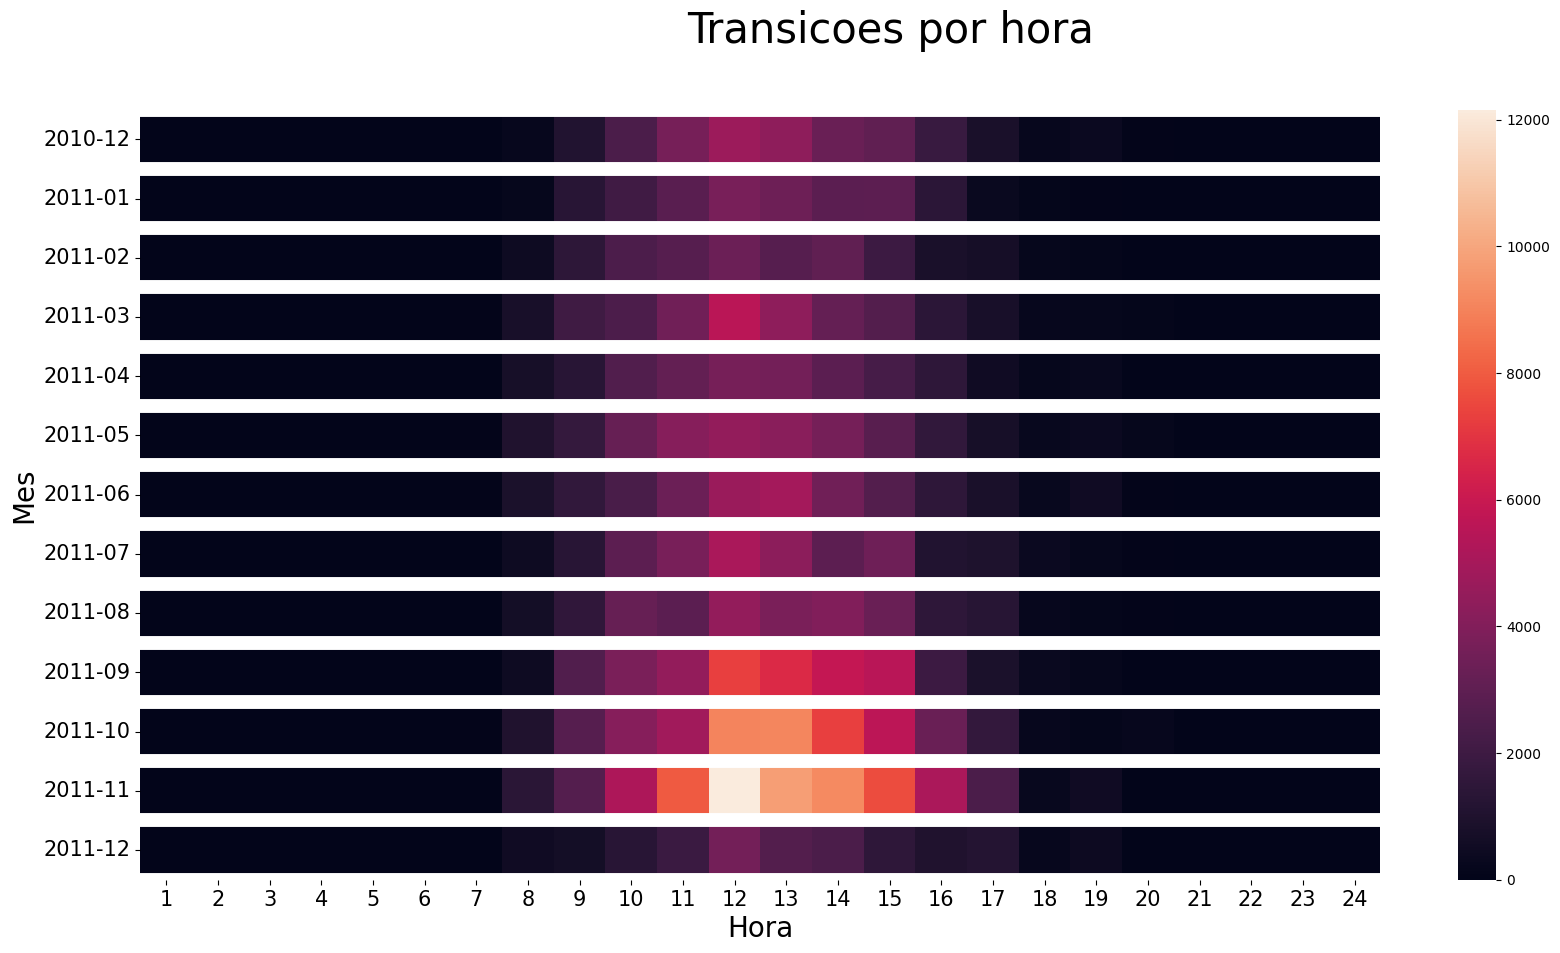

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponha que 'count_hours' seja seu DataFrame com os dados

# Filtrando as datas de 2010 a 2012
start_date = '2010-12-01'
end_date = '2011-12-31'

contagem_horas = contagem_horas[(contagem_horas.index >= start_date) & (contagem_horas.index <= end_date)]

# Plotando o mapa de calor (heatmap)
fig = plt.figure(figsize=(20, 10))
ax = fig.suptitle('Transicoes por hora', fontsize=30)

heatmap = sns.heatmap(data=contagem_horas)
plt.yticks(rotation=0, size=15)
plt.xticks(size=15)
heatmap.set_xlabel("Hora", fontsize=20)
heatmap.set_ylabel("Mes", fontsize=20)

# Linhas horizontais para separar os meses
for i in range(contagem_horas.shape[0] + 1):
    plt.axhline(i, color='white', lw=10)

plt.show()


#### Quais periodos do dia possui maior faturamento

In [ ]:
def daytime_encoder(date):
    if (date.hour >= 5)&(date.hour < 8):
        return "Madrugada"
    elif (date.hour >= 8)&(date.hour < 11):
        return "Manhã"
    elif (date.hour >= 11)&(date.hour < 13):
        return "Almoço"
    elif (date.hour >= 13)&(date.hour < 14):
        return "Começo de Tarde"
    elif (date.hour >= 14)&(date.hour < 15):
        return "Tarde"
    elif (date.hour >= 15)&(date.hour < 17):
        return "Fim de Tarde"
    elif (date.hour >= 17)&(date.hour < 21):
        return "Noite"
    else:
        return date.hour

df_temp['Data'] = df_temp['Data'].map(daytime_encoder)

<ipython-input-140-ad779617d5f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=df_temp,x="Data",order = ["Madrugada","Manhã","Almoço","Começo de Tarde","Tarde","Fim de Tarde","Noite"], palette="Set3")


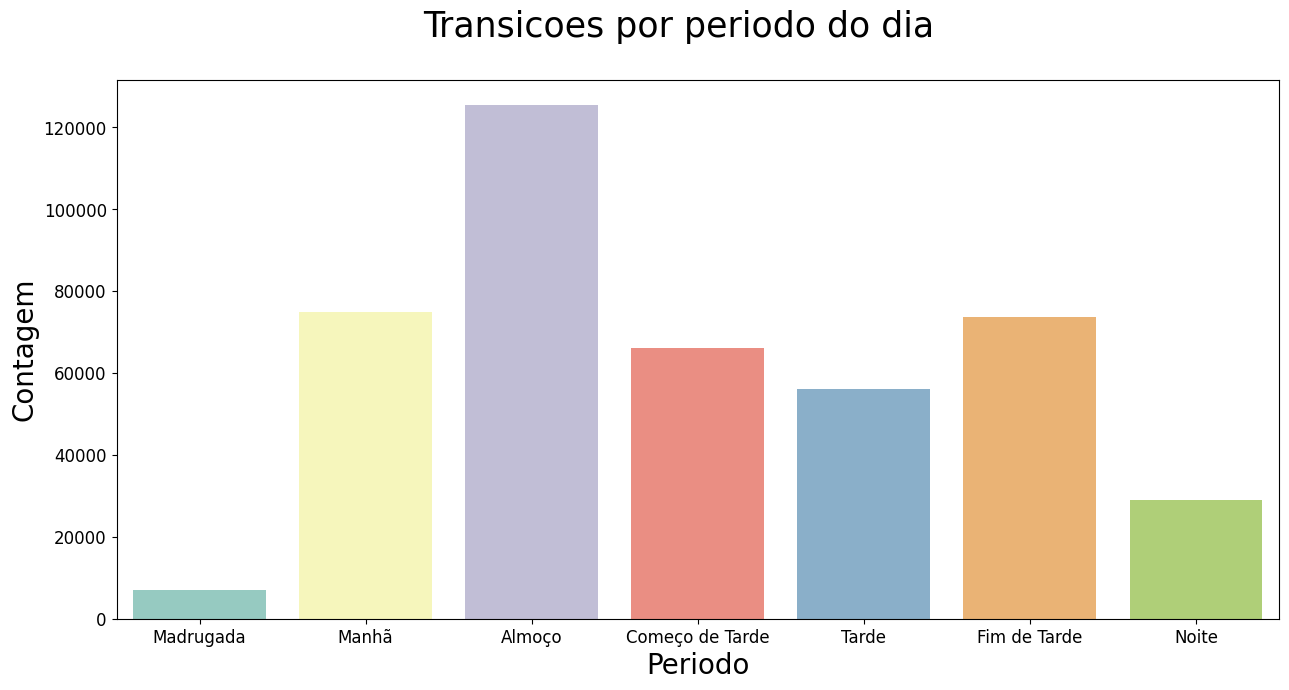

In [ ]:
fig  = plt.figure(figsize = (15,7)).suptitle('Transicoes por periodo do dia', fontsize=25)
countplot = sns.countplot(data=df_temp,x="Data",order = ["Madrugada","Manhã","Almoço","Começo de Tarde","Tarde","Fim de Tarde","Noite"], palette="Set3")

countplot.set_xlabel("Periodo",fontsize=20)
countplot.set_ylabel("Contagem",fontsize=20)

plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

#### Analises RFM

A análise RFM é uma técnica de marketing utilizada para classificar e agrupar quantitativamente os clientes com base na recência, frequência e total monetário das suas transacções recentes para identificar os melhores clientes e realizar campanhas de marketing direccionadas. O sistema atribui a cada cliente pontuações numéricas com base nestes factores para fornecer uma análise objetiva. A análise RFM baseia-se no ditado de marketing que diz que "80% do seu negócio vem de 20% dos seus clientes".

A análise RFM classifica cada cliente de acordo com os seguintes factores:

    Recência. Quão recente foi a última compra do cliente? Os clientes que fizeram uma compra recentemente ainda têm o produto em mente e é mais provável que comprem ou utilizem o produto novamente. As empresas medem frequentemente a atualidade em dias. Mas, dependendo do produto, podem medi-la em anos, semanas ou mesmo horas.

    Frequência. Quantas vezes é que este cliente fez uma compra num determinado período? Os clientes que compraram uma vez têm maior probabilidade de voltar a comprar. Além disso, os clientes que compram pela primeira vez podem ser bons alvos de publicidade de acompanhamento para os converter em clientes mais frequentes.

    Monetário. Quanto dinheiro é que o cliente gastou num determinado período? Os clientes que gastam muito dinheiro são mais susceptíveis de gastar dinheiro no futuro e têm um valor elevado para uma empresa.

In [ ]:
data_escolhida = dt.datetime(2011, 12, 1)

In [ ]:
df_vendas_dw['Data'] = pd.to_datetime(df_vendas_dw['Data'])

In [ ]:
rfm = df_vendas_dw.groupby('Cliente_Cod').agg({'Data': lambda Data: (data_escolhida - Data.max()).days,
                                     'Fatura_Cod'    : lambda Fatura_Cod: Fatura_Cod.nunique(),
                                     'Fatura_Total' : lambda Fatura_Total: Fatura_Total.sum()})

rfm.columns = ['recencia', 'frequencia', 'monetario']

In [ ]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recencia_score"] = pd.qcut(rfm['recencia'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequencia_score"] = pd.qcut(rfm['frequencia'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetario_score"] = pd.qcut(rfm['monetario'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["rfm_score"] = (rfm['recencia_score'].astype(str) +
                    rfm['frequencia_score'].astype(str))

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernando',
    r'[1-2][3-4]': 'em_risco',
    r'[1-2]5': 'nao_pode_perder',
    r'3[1-2]': 'prestes_a_perder',
    r'33': 'precisa_de_atencao',
    r'[3-4][4-5]': 'clientes_leais',
    r'41': 'promissor',
    r'51': 'novos consumidores',
    r'[4-5][2-3]': 'clientes_fieis',
    r'5[4-5]': 'campeoes'
}
rfm['segmento'] = rfm['rfm_score'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head(5)

,Cliente_Cod,recencia,frequencia,monetario,recencia_score,frequencia_score,monetario_score,rfm_score,segmento
0,708082083,-3054,49,1955.09,3,4,5,34,clientes_leais
1,708083283,-4569,35,936.38,5,1,1,51,novos consumidores
2,708084558,-2331,41,1575.04,1,2,4,12,hibernando
3,708085458,-4566,39,1088.69,5,1,2,51,novos consumidores
4,708086958,-2184,45,1572.80,1,3,4,13,em_risco


In [ ]:
campeoes = rfm[rfm['segmento'] == 'campeoes']

In [ ]:
campeoes_ordenados_maior_monetario = campeoes.sort_values(by='monetario', ascending=False)

In [ ]:
campeoes_ordenados_maior_monetario

,level_0,index,Cliente_Cod,recencia,frequencia,monetario,recencia_score,frequencia_score,monetario_score,rfm_score,segmento
1177,1177,1177,710529708,-4569,54,20796.61,5,5,5,55,campeoes
8355,8355,8355,787516908,-4565,53,8189.76,5,5,5,55,campeoes
1020,1020,1020,710178558,-4585,48,7308.83,5,4,5,54,campeoes
4042,4042,4042,715765758,-4570,47,6564.55,5,4,5,54,campeoes
1498,1498,1498,711136008,-4570,54,6531.73,5,5,5,55,campeoes
...,...,...,...,...,...,...,...,...,...,...,...
4825,4825,4825,717382608,-4565,49,680.15,5,4,1,54,campeoes
4506,4506,4506,716709858,-4568,52,676.05,5,5,1,55,campeoes
2614,2614,2614,713187033,-4570,48,650.18,5,4,1,54,campeoes
10075,10075,10075,827051808,-4569,46,649.58,5,4,1,54,campeoes


In [ ]:
contagem_segmentos = rfm.groupby("segmento").agg({"Cliente_Cod": "count"})
contagem_segmentos.reset_index(inplace=True)
contagem_segmentos.columns = ['segmento', 'contagem']
contagem_segmentos.head(15)

,segmento,contagem
0,campeoes,954
1,clientes_fieis,1558
2,clientes_leais,1731
3,em_risco,1543
4,hibernando,1848
5,nao_pode_perder,657
6,novos consumidores,340
7,precisa_de_atencao,392
8,prestes_a_perder,761
9,promissor,343


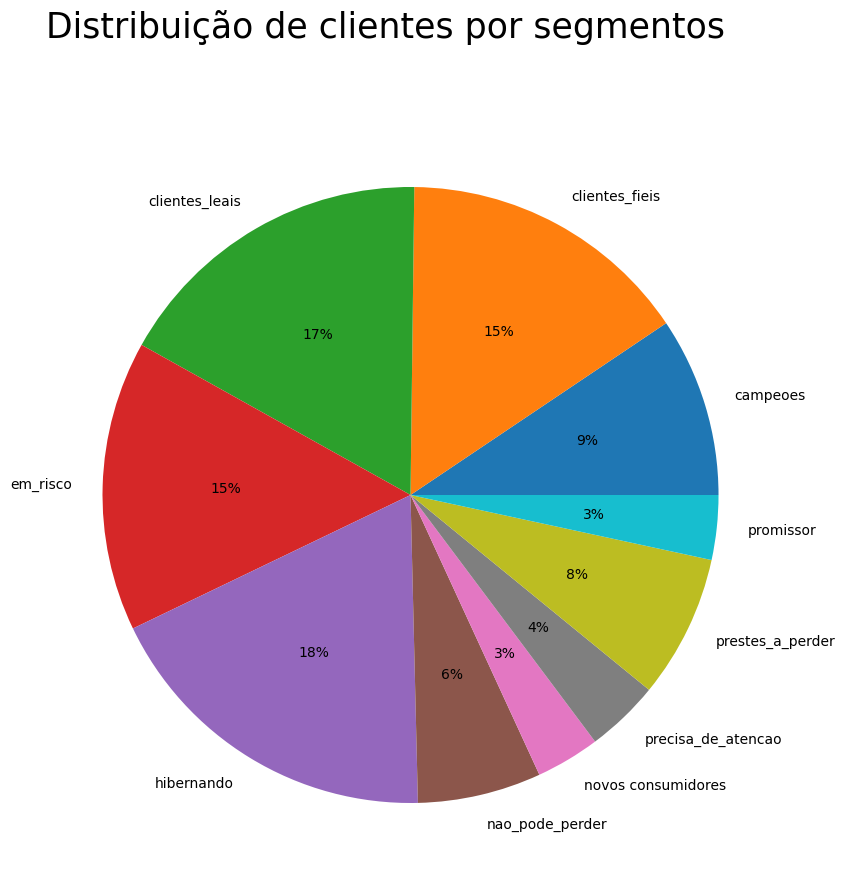

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Distribuição de clientes por segmentos', fontsize=25)
plt.pie(contagem_segmentos["contagem"], labels = contagem_segmentos["segmento"], autopct='%.0f%%')

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
data_escolhida = dt.datetime(2011, 12, 1)
df_vendas_dw['Data'] = pd.to_datetime(df_vendas_dw['Data'])

rfm = df_vendas_dw.groupby('Cliente_Cod').agg({'Data': lambda Data: (data_escolhida - Data.max()).days,
                                     'Fatura_Cod'    : lambda Fatura_Cod: Fatura_Cod.nunique(),
                                     'Fatura_Total' : lambda Fatura_Total: Fatura_Total.sum()})

rfm.columns = ['recencia', 'frequencia', 'monetario']
features = ['recencia', 'frequencia', 'monetario']

# Dividindo os dados em conjuntos de treinamento e teste
X = rfm[features]
y = rfm['monetario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escolhendo o modelo (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print('Erro médio quadrático:', mse)

Erro médio quadrático: 1285.6350891164054


             Recência  Frequência  Valor_Monetário R_Score F_Score M_Score  \
Cliente_Cod                                                                  
708082083        1520          49          1955.09       2       2       1   
708083283           5          35           936.38       1       4       4   
708084558        2243          41          1575.04       4       3       2   
708085458           8          39          1088.69       1       4       3   
708086958        2390          45          1572.80       4       2       2   
...               ...         ...              ...     ...     ...     ...   
828288333        1674          46          1231.24       3       2       3   
828291858        1355          48          1835.91       2       2       1   
828294933        1919          49          1258.85       3       2       3   
828298908        2472          45          1154.50       4       2       3   
828343083        1786          41          6435.12       3      

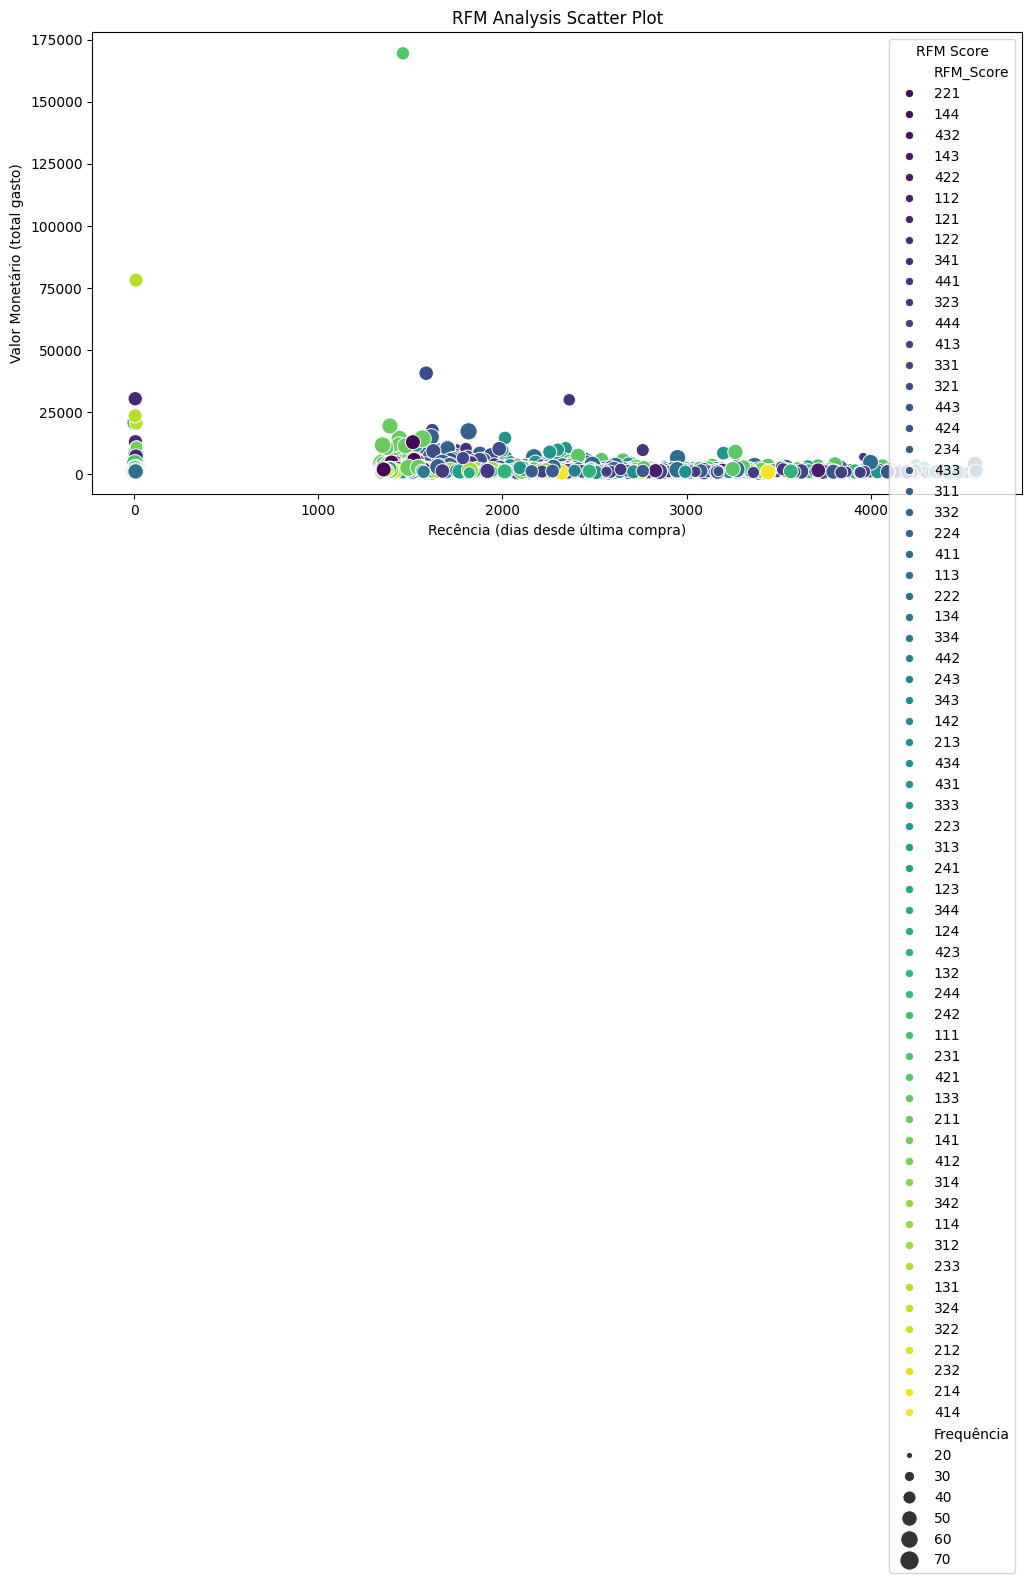

<ipython-input-7-4846e4586d06>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Score', data=rfm, palette='viridis')


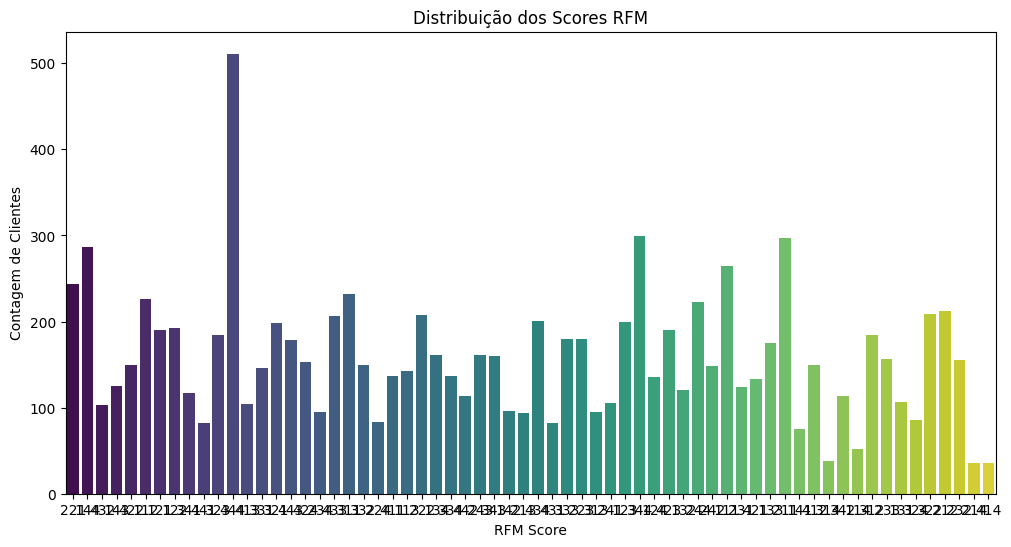

In [ ]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

df_vendas_dw['Data'] = pd.to_datetime(df_vendas_dw['Data'], format='%d/%m/%Y %H:%M')

# Definindo a data de referência para calcular recência
data_referencia = dt.datetime.now()
# Calculando RFM
rfm = df_vendas_dw.groupby('Cliente_Cod').agg({
    'Data': lambda x: (data_referencia - x.max()).days,
    'Cliente_Cod': 'count',
    'Fatura_Total': 'sum'
}).rename(columns={
    'Data': 'Recência',
    'Cliente_Cod': 'Frequência',
    'Fatura_Total': 'Valor_Monetário'
})

# Normalizando os scores RFM
rfm['R_Score'] = pd.qcut(rfm['Recência'], 4, labels=['1', '2', '3', '4'])
rfm['F_Score'] = pd.qcut(rfm['Frequência'], 4, labels=['4', '3', '2', '1'])
rfm['M_Score'] = pd.qcut(rfm['Valor_Monetário'], 4, labels=['4', '3', '2', '1'])

# Combinando os scores em um único RFM score
rfm['RFM_Score'] = rfm.R_Score.astype(str) + rfm.F_Score.astype(str) + rfm.M_Score.astype(str)

print(rfm)

rfm_sorted = rfm.sort_values(by=['RFM_Score'], ascending=[False])

# Exibindo os clientes com os maiores RFM Scores
print("Clientes com os maiores RFM Scores:")
print(rfm_sorted.head())

# Visualização do gráfico de dispersão destacando os melhores clientes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recência', y='Valor_Monetário', size='Frequência', hue='RFM_Score', data=rfm, palette='viridis', sizes=(20, 200))
plt.title('RFM Analysis Scatter Plot')
plt.xlabel('Recência (dias desde última compra)')
plt.ylabel('Valor Monetário (total gasto)')
plt.legend(title='RFM Score')
plt.show()

# Visualização da distribuição dos scores RFM
plt.figure(figsize=(12, 6))
sns.countplot(x='RFM_Score', data=rfm, palette='viridis')
plt.title('Distribuição dos Scores RFM')
plt.xlabel('RFM Score')
plt.ylabel('Contagem de Clientes')
plt.show()